In [1]:
# connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import urllib.request
import json

In [18]:
Population_url = "https://data.lacity.org/api/views/nxs9-385f/rows.json?accessType=DOWNLOAD"
type(Population_url)

str

In [19]:
response = urllib.request.urlopen(Population_url)
response.code

200

In [20]:
from pprint import pprint

In [21]:
json_string = response.read().decode('utf-8')
pprint(json_string[:500])

('{\n'
 '  "meta" : {\n'
 '    "view" : {\n'
 '      "id" : "nxs9-385f",\n'
 '      "name" : "2010 Census Populations by Zip Code",\n'
 '      "assetType" : "dataset",\n'
 '      "attribution" : "U.S. Census",\n'
 '      "attributionLink" : "https://www.census.gov/2010census/data/",\n'
 '      "averageRating" : 0,\n'
 '      "category" : "Community & Economic Development",\n'
 '      "createdAt" : 1457318871,\n'
 '      "description" : "This data comes from the 2010 Census Profile of '
 'General Population and Housing Characteristics. Zip codes are limite')


In [23]:
population_json = json.loads(json_string)
type(population_json)

dict

In [24]:
population_json

{'meta': {'view': {'id': 'nxs9-385f',
   'name': '2010 Census Populations by Zip Code',
   'assetType': 'dataset',
   'attribution': 'U.S. Census',
   'attributionLink': 'https://www.census.gov/2010census/data/',
   'averageRating': 0,
   'category': 'Community & Economic Development',
   'createdAt': 1457318871,
   'description': 'This data comes from the 2010 Census Profile of General Population and Housing Characteristics. Zip codes are limited to those that fall at least partially within LA city boundaries. The dataset will be updated after the next census in 2020. \nTo view all possible columns and access the data directly, visit http://factfinder.census.gov/faces/affhelp/jsf/pages/metadata.xhtml?lang=en&type=table&id=table.en.DEC_10_SF1_SF1DP1#main_content.',
   'displayType': 'table',
   'downloadCount': 292404,
   'hideFromCatalog': False,
   'hideFromDataJson': False,
   'indexUpdatedAt': 1480487977,
   'licenseId': 'CC0_10',
   'newBackend': True,
   'numberOfComments': 0,
  

In [25]:
population_json.keys()

dict_keys(['meta', 'data'])

In [45]:
population_json['meta']

{'view': {'id': 'nxs9-385f',
  'name': '2010 Census Populations by Zip Code',
  'assetType': 'dataset',
  'attribution': 'U.S. Census',
  'attributionLink': 'https://www.census.gov/2010census/data/',
  'averageRating': 0,
  'category': 'Community & Economic Development',
  'createdAt': 1457318871,
  'description': 'This data comes from the 2010 Census Profile of General Population and Housing Characteristics. Zip codes are limited to those that fall at least partially within LA city boundaries. The dataset will be updated after the next census in 2020. \nTo view all possible columns and access the data directly, visit http://factfinder.census.gov/faces/affhelp/jsf/pages/metadata.xhtml?lang=en&type=table&id=table.en.DEC_10_SF1_SF1DP1#main_content.',
  'displayType': 'table',
  'downloadCount': 292404,
  'hideFromCatalog': False,
  'hideFromDataJson': False,
  'indexUpdatedAt': 1480487977,
  'licenseId': 'CC0_10',
  'newBackend': True,
  'numberOfComments': 0,
  'oid': 18583733,
  'prove

In [43]:
pop_emlist = population_json['meta']
len(pop_emlist)

1

In [27]:
population_json['data']

[['row-rxi4~97qp_yzif',
  '00000000-0000-0000-59F8-45EF46B4850A',
  0,
  1457319232,
  None,
  1457319232,
  None,
  '{ }',
  '91371',
  '1',
  '73.5',
  '0',
  '1',
  '1',
  '1.00'],
 ['row-pmdj_3j5i~upbu',
  '00000000-0000-0000-39F4-389B31B6944F',
  0,
  1457319232,
  None,
  1457319232,
  None,
  '{ }',
  '90001',
  '57110',
  '26.6',
  '28468',
  '28642',
  '12971',
  '4.40'],
 ['row-prp3~9hzt~8x75',
  '00000000-0000-0000-20E1-1D0769A1A474',
  0,
  1457319232,
  None,
  1457319232,
  None,
  '{ }',
  '90002',
  '51223',
  '25.5',
  '24876',
  '26347',
  '11731',
  '4.36'],
 ['row-6zzj.6wfu_4y93',
  '00000000-0000-0000-A6FD-6F9D73AD2D4D',
  0,
  1457319232,
  None,
  1457319232,
  None,
  '{ }',
  '90003',
  '66266',
  '26.3',
  '32631',
  '33635',
  '15642',
  '4.22'],
 ['row-q7mf~xhun~zduk',
  '00000000-0000-0000-1C43-086A87570AEE',
  0,
  1457319232,
  None,
  1457319232,
  None,
  '{ }',
  '90004',
  '62180',
  '34.8',
  '31302',
  '30878',
  '22547',
  '2.73'],
 ['row-ux7w.5hix

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [99]:
df = pd.DataFrame(population_json['data'], columns=[c['name'] for c in population_json['meta']['view']['columns']])

In [100]:
df.tail()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
314,row-qb38.g5sy_qsgx,00000000-0000-0000-9B54-F4D2E025FB0B,0,1457319232,None,1457319232,None,{ },93552,38158,28.4,18711,19447,9690,3.93
315,row-wxxc~3483_z69u,00000000-0000-0000-1A9A-EE5BC2F5AA62,0,1457319232,None,1457319232,None,{ },93553,2138,43.3,1121,1017,816,2.62
316,row-x3z7~sdsk.tr2p,00000000-0000-0000-7FBD-2955E8064673,0,1457319232,None,1457319232,None,{ },93560,18910,32.4,9491,9419,6469,2.92
317,row-4cis.j5is_uzfe,00000000-0000-0000-B397-2DEE2F89F5D1,0,1457319232,None,1457319232,None,{ },93563,388,44.5,263,125,103,2.53
318,row-6g87-6qww.szhj,00000000-0000-0000-BF26-D77207B75C56,0,1457319232,None,1457319232,None,{ },93591,7285,30.9,3653,3632,1982,3.67


In [101]:
df.dtypes

sid                       object
id                        object
position                   int64
created_at                 int64
created_meta              object
updated_at                 int64
updated_meta              object
meta                      object
Zip Code                  object
Total Population          object
Median Age                object
Total Males               object
Total Females             object
Total Households          object
Average Household Size    object
dtype: object

In [102]:
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'Zip Code', 'Total Population', 'Median Age',
       'Total Males', 'Total Females', 'Total Households',
       'Average Household Size'],
      dtype='object')

In [103]:
df.describe(include='all')

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319,319,319.0,3.190000e+02,0,3.190000e+02,0,319,319,319,319,319,319,319,319
unique,319,319,NaN,NaN,0,NaN,0,1,319,313,177,310,313,307,182
top,row-rxi4~97qp_yzif,00000000-0000-0000-59F8-45EF46B4850A,NaN,NaN,NaN,NaN,NaN,{ },91371,0,33.9,0,0,0,0.00
freq,1,1,NaN,NaN,NaN,NaN,NaN,319,1,6,7,7,6,8,8
mean,NaN,NaN,0.0,1.457319e+09,NaN,1.457319e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.0,1.457319e+09,NaN,1.457319e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.0,1.457319e+09,NaN,1.457319e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.0,1.457319e+09,NaN,1.457319e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.0,1.457319e+09,NaN,1.457319e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df = df.drop(['sid','meta','created_meta','created_at','position','updated_meta'], axis=1)
df.head(5)

,id,updated_at,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,00000000-0000-0000-59F8-45EF46B4850A,1457319232,91371,1,73.5,0,1,1,1.00
1,00000000-0000-0000-39F4-389B31B6944F,1457319232,90001,57110,26.6,28468,28642,12971,4.40
2,00000000-0000-0000-20E1-1D0769A1A474,1457319232,90002,51223,25.5,24876,26347,11731,4.36
3,00000000-0000-0000-A6FD-6F9D73AD2D4D,1457319232,90003,66266,26.3,32631,33635,15642,4.22
4,00000000-0000-0000-1C43-086A87570AEE,1457319232,90004,62180,34.8,31302,30878,22547,2.73


In [105]:
df.shape

(319, 9)

In [106]:
duplicate_rows_population_df= df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows_population_df.shape)

Number of duplicate rows: (0, 9)


In [107]:
print(df.isnull().sum())

id                        0
updated_at                0
Zip Code                  0
Total Population          0
Median Age                0
Total Males               0
Total Females             0
Total Households          0
Average Household Size    0
dtype: int64


In [108]:
df.shape

(319, 9)

In [110]:
df

,id,updated_at,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,00000000-0000-0000-59F8-45EF46B4850A,1457319232,91371,1,73.5,0,1,1,1.00
1,00000000-0000-0000-39F4-389B31B6944F,1457319232,90001,57110,26.6,28468,28642,12971,4.40
2,00000000-0000-0000-20E1-1D0769A1A474,1457319232,90002,51223,25.5,24876,26347,11731,4.36
3,00000000-0000-0000-A6FD-6F9D73AD2D4D,1457319232,90003,66266,26.3,32631,33635,15642,4.22
4,00000000-0000-0000-1C43-086A87570AEE,1457319232,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...,...,...
314,00000000-0000-0000-9B54-F4D2E025FB0B,1457319232,93552,38158,28.4,18711,19447,9690,3.93
315,00000000-0000-0000-1A9A-EE5BC2F5AA62,1457319232,93553,2138,43.3,1121,1017,816,2.62
316,00000000-0000-0000-7FBD-2955E8064673,1457319232,93560,18910,32.4,9491,9419,6469,2.92
317,00000000-0000-0000-B397-2DEE2F89F5D1,1457319232,93563,388,44.5,263,125,103,2.53


In [111]:
df['Zip Code'].unique()

array(['91371', '90001', '90002', '90003', '90004', '90005', '90006',
       '90007', '90008', '90010', '90011', '90012', '90013', '90014',
       '90015', '90016', '90017', '90018', '90019', '90020', '90021',
       '90022', '90023', '90024', '90025', '90026', '90027', '90028',
       '90029', '90031', '90032', '90033', '90034', '90035', '90036',
       '90037', '90038', '90039', '90040', '90041', '90042', '90043',
       '90044', '90045', '90046', '90047', '90048', '90049', '90056',
       '90057', '90058', '90059', '90061', '90062', '90063', '90064',
       '90065', '90066', '90067', '90068', '90069', '90071', '90073',
       '90077', '90079', '90089', '90090', '90094', '90095', '90201',
       '90210', '90211', '90212', '90220', '90221', '90222', '90230',
       '90232', '90240', '90241', '90242', '90245', '90247', '90248',
       '90249', '90250', '90254', '90255', '90260', '90262', '90263',
       '90265', '90266', '90270', '90272', '90274', '90275', '90277',
       '90278', '902

In [112]:
df['Zip Code'].nunique(dropna = True)

319

In [113]:
df['Total Population'].nunique(dropna = True)

313

In [114]:
#Comparing the Total population Against the zip code
Zip_compare= pd.pivot_table(data=df, index=['Zip Code'], values='Total Population', aggfunc='mean').reset_index()
Zip_compare.sort_values(by='Total Population',ascending=False, inplace= True)
Zip_compare.reset_index(inplace=True)
Zip_compare.drop(['index'],axis=1,inplace=True)

In [115]:
Zip_compare

,Zip Code,Total Population
0,90650,105549.0
1,90011,103892.0
2,91331,103689.0
3,90201,101279.0
4,90280,94396.0
...,...,...
314,90831,0.0
315,90090,0.0
316,90506,0.0
317,91608,0.0


In [116]:
#Comparing total population with refrence to zip code with males and females.
# grouping the data by 'Zip Code' and 'Total Population', and selecting the first row for each group
pop_group = df.groupby(['Zip Code', 'Total Population'])['Total Males', 'Total Females'].first()

# reseting the index to make the group columns regular columns
pop_group = pop_group.reset_index()

print(pop_group)

    Zip Code Total Population Total Males Total Females
0      90001            57110       28468         28642
1      90002            51223       24876         26347
2      90003            66266       32631         33635
3      90004            62180       31302         30878
4      90005            37681       19299         18382
..       ...              ...         ...           ...
314    93552            38158       18711         19447
315    93553             2138        1121          1017
316    93560            18910        9491          9419
317    93563              388         263           125
318    93591             7285        3653          3632

[319 rows x 4 columns]


<ipython-input-116-00c2ac588481>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_group = df.groupby(['Zip Code', 'Total Population'])['Total Males', 'Total Females'].first()


In [123]:
# Sorting the  data by total population in descending order
df = df.sort_values(by=["Total Population"], ascending=False)

# Comparing columns
df_comparison = df[["Zip Code", "Total Population", "Total Males", "Total Females"]]

# Claculating statistics
stats = df_comparison.describe()

print(stats)

        Total Males  Total Females
count    319.000000     319.000000
mean   16391.564263   16849.777429
std    10747.495566   10934.986468
min        0.000000       0.000000
25%     9763.500000    9633.500000
50%    15283.000000   16202.000000
75%    22219.500000   22690.500000
max    52794.000000   53185.000000


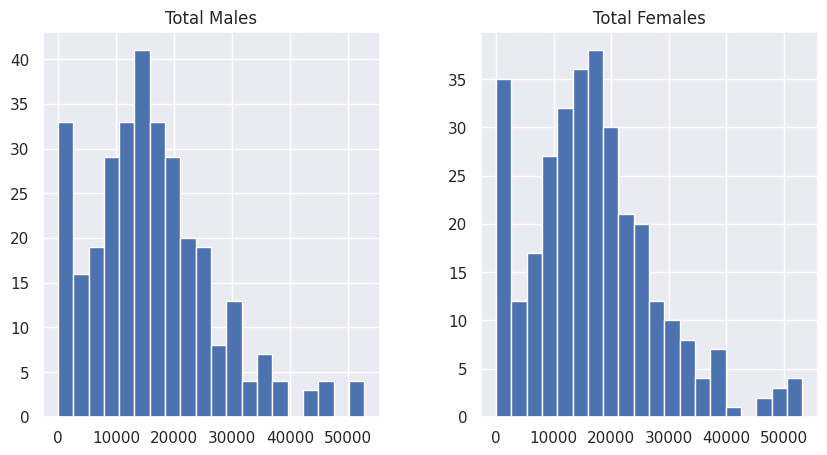

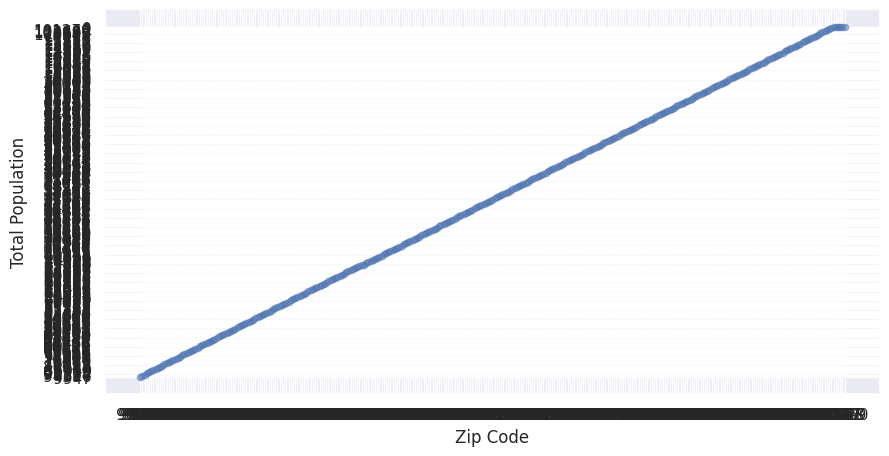

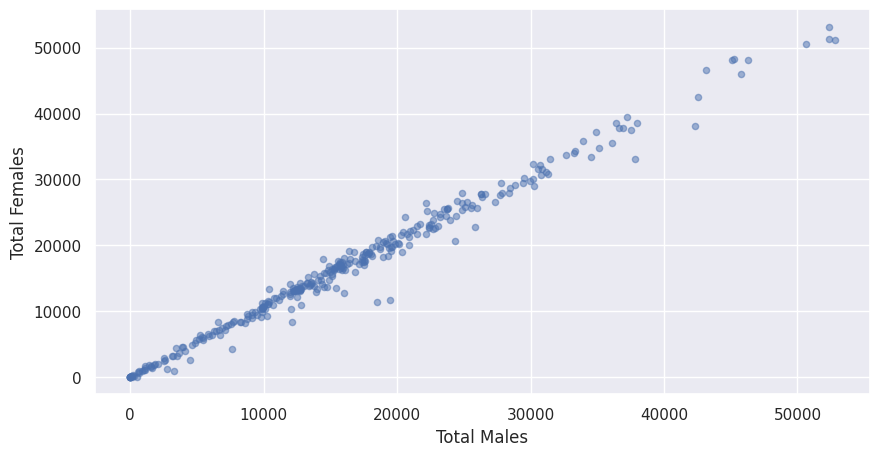

In [125]:
#Exploratory Analysis
# Histogram for males, females
df[['Total Population', 'Total Males', 'Total Females']].hist(bins=20, figsize=(10, 5))
plt.show()

# Scatter plot for total population vs zip code
df.plot(kind='scatter', x='Zip Code', y='Total Population', alpha=0.5, figsize=(10, 5))
plt.show()

# Scatter plot for total males vs total females
df.plot(kind='scatter', x='Total Males', y='Total Females', alpha=0.5, figsize=(10, 5))
plt.show()